In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get Turkey's energy production dataset from epias
start_date = '2020-01-01'
end_date = '2021-01-01'
production = uretim.gerceklesen(start_date, end_date,)

In [3]:
production.describe()

,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
count,8808.00000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.0,8808.0,8808.000000,8808.000000
mean,11.50000,7746.026504,6515.794933,4303.827785,2331.419566,7111.608642,2788.028970,47.980268,35.631681,1061.087693,252.972661,431.470344,463.165296,0.0,0.0,-62.418569,33026.595775
std,6.92258,3952.323549,3171.403680,622.512318,1448.579504,1716.678584,1608.350955,66.317553,3.309019,105.220071,79.484606,158.347459,36.506329,0.0,0.0,315.830842,5495.008940
min,0.00000,496.660000,366.190000,2189.100000,419.440000,992.650000,139.760000,0.000000,0.000000,663.530000,48.570000,167.240000,369.680000,0.0,0.0,-1949.250000,15246.640000
25%,5.75000,3980.625000,3902.125000,3921.495000,1090.195000,6708.195000,1370.720000,0.000000,34.200000,993.385000,211.960000,272.177500,439.615000,0.0,0.0,-313.360000,29067.472500
50%,11.50000,8929.805000,6796.245000,4305.005000,1809.795000,7656.220000,2588.285000,2.670000,36.400000,1089.000000,242.880000,438.840000,458.440000,0.0,0.0,-85.000000,32908.105000
75%,17.25000,11058.337500,9052.125000,4732.692500,3552.550000,8340.122500,4092.695000,93.282500,37.800000,1141.867500,333.390000,598.862500,480.445000,0.0,0.0,182.000000,37484.857500
max,23.00000,14615.630000,15891.780000,6149.070000,5744.500000,8790.980000,6861.040000,297.990000,43.600000,1255.580000,362.100000,692.620000,596.090000,0.0,0.0,789.000000,45210.030000


In [4]:
production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8808 entries, 0 to 8807
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tarih           8808 non-null   datetime64[ns]
 1   Saat            8808 non-null   int64         
 2   Doğalgaz        8808 non-null   float64       
 3   Barajlı         8808 non-null   float64       
 4   Linyit          8808 non-null   float64       
 5   Akarsu          8808 non-null   float64       
 6   İthal Kömür     8808 non-null   float64       
 7   Rüzgar          8808 non-null   float64       
 8   Güneş           8808 non-null   float64       
 9   Fuel Oil        8808 non-null   float64       
 10  Jeo Termal      8808 non-null   float64       
 11  Asfaltit Kömür  8808 non-null   float64       
 12  Taş Kömür       8808 non-null   float64       
 13  Biyokütle       8808 non-null   float64       
 14  Nafta           8808 non-null   int64         
 15  LNG      

In [5]:
feature_cols = [col for col in production.columns if col not in ['Toplam', 'Tarih', 'Saat',
                                                                 'Nafta', 'LNG']]
pred_cols = ['Toplam']

X = production[feature_cols]
y = production[pred_cols]

y = y.where(y<y.mean(), 1)
y = y.where(y==1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [6]:
# get the model
model = GradientBoostingClassifier()

# define the evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, )

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning

In [7]:
np.mean(n_scores), np.std(n_scores)

(0.9684237898784089, 0.006683940556746978)

In [13]:
# fit the data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
y_pred

array([0., 0., 0., ..., 1., 1., 0.])

important hyperparameters: number of models, the learning rate, the data sample, and should be paired together in pairs.

In [17]:
# effect of number of trees and learning rate

# get a list of models to evaluate
def get_models():
    models = dict()
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

# evaluate given model using cv
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate cv scores
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models = get_models()
results, names = [], []

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning

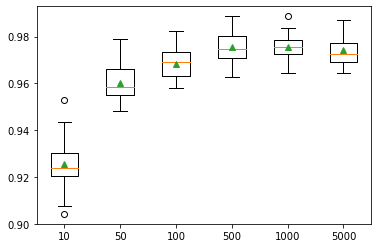

In [19]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [21]:
%%capture
# let's make a grid search
model = GradientBoostingClassifier()

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

# define the evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define gs
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# fit grid
grid_result = grid_search.fit(X_train, y_train)

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning

KeyboardInterrupt: 